In [ ]:
import pandas as pd
from pycaret.classification import *
import shap

In [11]:
df = pd.read_parquet('./data/final.parquet')

In [ ]:
df.head()

In [ ]:
df.count()

In [ ]:
#df = df[(df.sepsis3 == 1)]
#df.count()

In [ ]:
df.columns.tolist()

In [14]:
df.drop(['stay_id', 'subject_id', 'hadm_id','sepsis3'], axis=1, inplace=True)

In [16]:
exp1 = setup(df, target = 'hospital_expire_flag', numeric_imputation='median', fix_imbalance=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,hospital_expire_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22440, 113)"
5,Missing Values,True
6,Numeric Features,57
7,Categorical Features,55
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8601,0.8509,0.3528,0.6541,0.4579,0.3857,0.4102,0.7230
gbc,Gradient Boosting Classifier,0.8564,0.8454,0.3129,0.6500,0.4218,0.3513,0.3822,4.9940
xgboost,Extreme Gradient Boosting,0.8513,0.8354,0.3502,0.5973,0.4410,0.3620,0.3794,4.2960
et,Extra Trees Classifier,0.8499,0.8168,0.2142,0.6644,0.3235,0.2632,0.3174,0.9190
rf,Random Forest Classifier,0.8473,0.8215,0.1952,0.6512,0.2998,0.2410,0.2971,0.9150
ada,Ada Boost Classifier,0.8448,0.8158,0.3578,0.5580,0.4350,0.3503,0.3624,1.1300
dummy,Dummy Classifier,0.8324,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0970
dt,Decision Tree Classifier,0.7787,0.6225,0.3874,0.3544,0.3699,0.2361,0.2366,0.3100
ridge,Ridge Classifier,0.7572,0.0000,0.7334,0.3834,0.5034,0.3631,0.3966,0.1150
lda,Linear Discriminant Analysis,0.7570,0.8301,0.7326,0.3831,0.5029,0.3625,0.3960,0.3440


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [18]:
# Rank: 1st, AUC
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8523,0.8608,0.3422,0.6040,0.4369,0.3593,0.3786
1,0.8631,0.8665,0.3498,0.6765,0.4612,0.3917,0.4198
2,0.8593,0.8654,0.3308,0.6591,0.4405,0.3700,0.3989
3,0.8606,0.8646,0.3650,0.6486,0.4672,0.3941,0.4157
4,0.8606,0.8438,0.3598,0.6552,0.4645,0.3921,0.4154
5,0.8555,0.8447,0.3447,0.6276,0.4450,0.3699,0.3919
6,0.8670,0.8350,0.3939,0.6797,0.4988,0.4283,0.4495
7,0.8637,0.8715,0.3232,0.7025,0.4427,0.3769,0.4140
8,0.8611,0.8265,0.3498,0.6619,0.4577,0.3867,0.4126


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


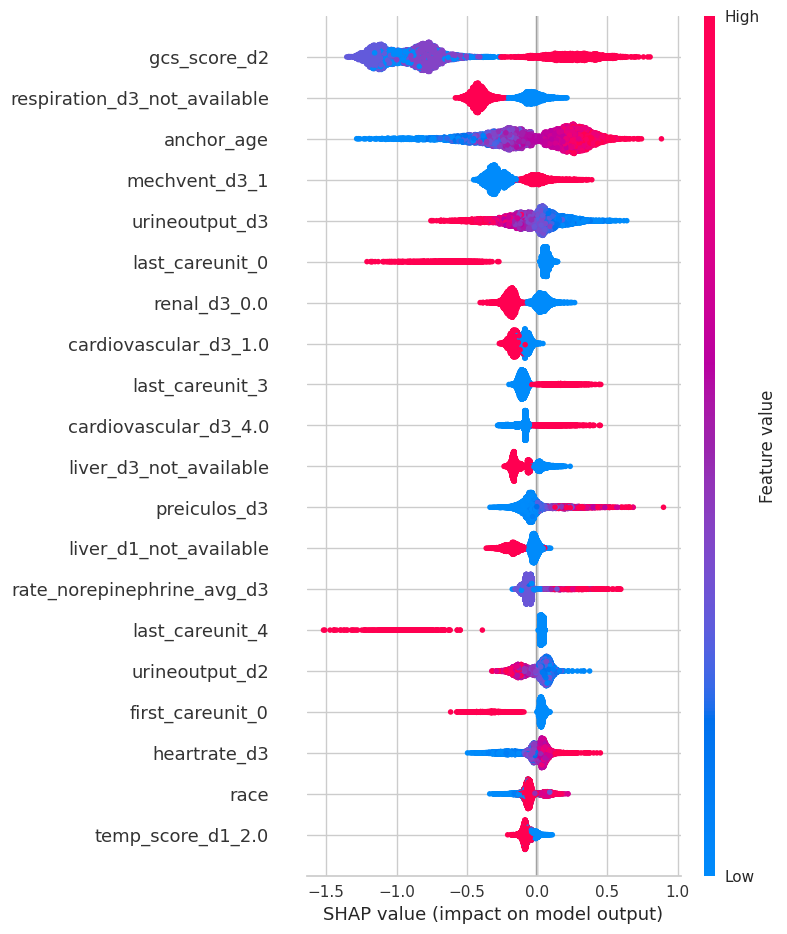

In [19]:
interpret_model(lgbm)

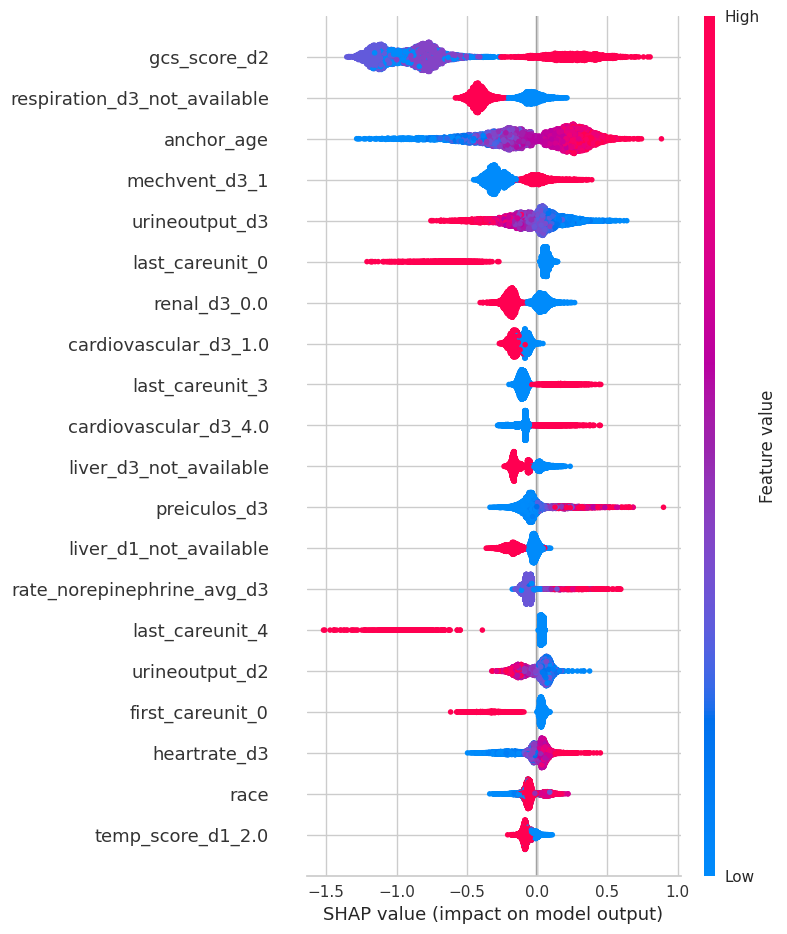

In [20]:
interpret_model(lgbm, plot='summary')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


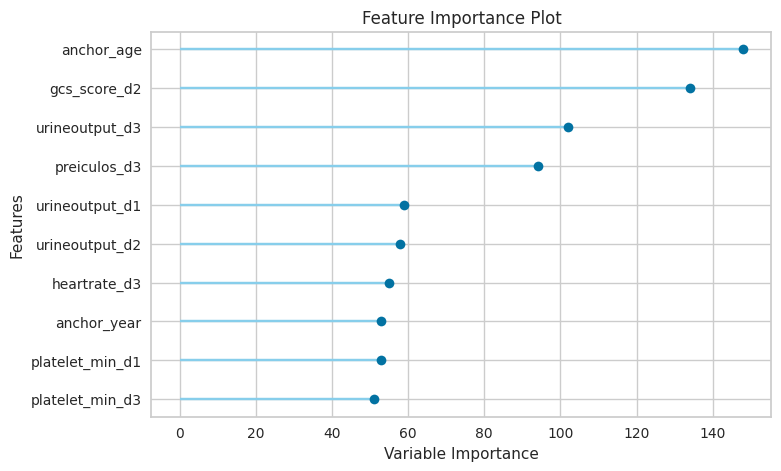

In [21]:
plot_model(lgbm, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


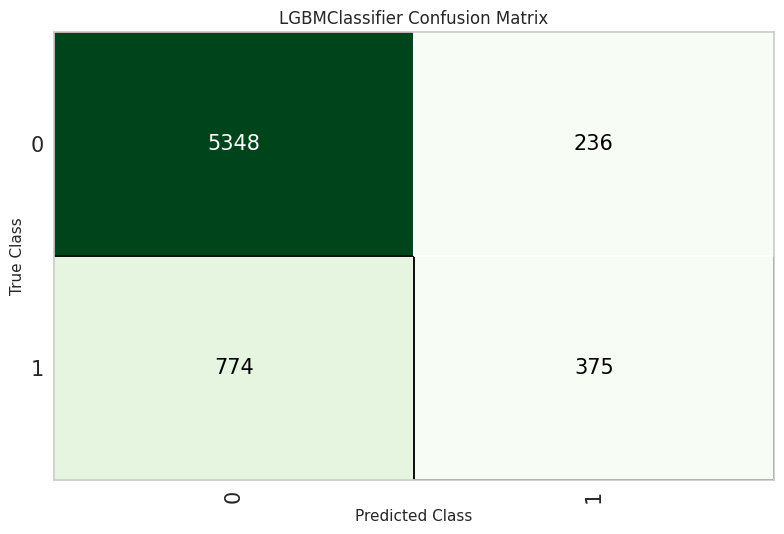

In [22]:
plot_model(lgbm, plot = 'confusion_matrix')

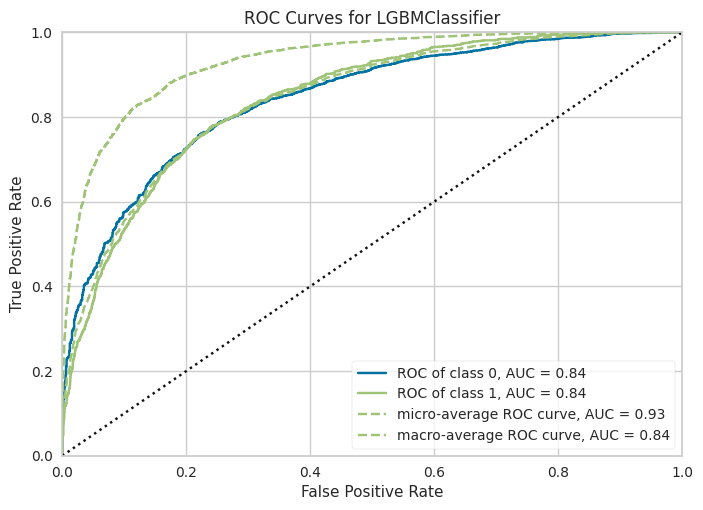

In [26]:
plot_model(lgbm, plot='auc')

In [27]:
evaluate_model(lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8500,0.8435,0.3264,0.6137,0.4261,0.3490,0.3721


,race,anchor_age,anchor_year,pao2fio2ratio_novent_avg_d1,pao2fio2ratio_vent_avg_d1,rate_epinephrine_avg_d1,rate_norepinephrine_avg_d1,rate_dopamine_avg_d1,rate_dobutamine_avg_d1,platelet_min_d1,...,urineoutput_score_d3_0.0,urineoutput_score_d3_1.0,urineoutput_score_d3_10.0,urineoutput_score_d3_5.0,urineoutput_score_d3_8.0,urineoutput_score_d3_not_available,mechvent_d3_1,hospital_expire_flag,Label,Score
0,28.0,64.0,2192.0,138.333328,253.746796,0.030032,0.200602,5.495194,4.378946,203.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.7358
1,28.0,69.0,2155.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,210.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9896
2,28.0,53.0,2179.0,225.000000,388.333344,0.030032,0.105583,5.495194,4.378946,215.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9279
3,28.0,60.0,2145.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,385.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9373
4,27.0,74.0,2134.0,225.000000,253.746796,0.030032,0.105583,3.346423,4.378946,140.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,28.0,68.0,2155.0,224.444443,190.097229,0.030032,0.105583,5.495194,4.378946,254.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9657
6729,28.0,87.0,2174.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,178.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8957
6730,28.0,74.0,2114.0,225.000000,253.746796,0.030032,0.105583,5.495194,4.378946,85.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.8670
6731,28.0,80.0,2149.0,326.000000,327.000000,0.030032,0.105583,5.495194,4.378946,148.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8980


In [29]:
final_lgbm = finalize_model(lgbm)

In [30]:
print(lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [31]:
#save_model(lgbm, "models/lgbm")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='hospital_expire_flag',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                                 min_child_sample

/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.19724e-14): result may not be accurate.
  overwrite_a=True).T
/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/root/anaconda3/envs/tf1/lib/python3.7/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_interc